<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
import pyAgrum.skbn as skbn
import pyAgrum.lib.notebook as gnb

import os
import pandas

# Initialization of parameters

First, we initialize the parameters to indicate properties we want our classifier to have.

In [2]:
BNTest= skbn.BNClassifier(learningMethod = 'Chow-Liu', aPriori= 'Smoothing', aPrioriWeight = 0.5, 
                          discretizationStrategy = 'quantile', usePR = True, significant_digit = 13)

Then, we train the classifier thanks to two types of objects.

# Learn from csv file

In [3]:
BNTest.fit(filename = 'res/creditCardTest.csv', targetName = 'Class')

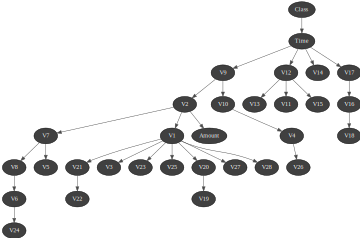

In [4]:
gnb.showBN(BNTest.bn)

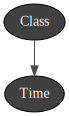

In [5]:
gnb.showBN(BNTest.MarkovBlanket) 

# Learn from array-likes

We use a method to transform the csv file in two array-likes in order to train from the same database.

In [6]:
xTrain, yTrain = BNTest.XYfromCSV(filename = 'res/creditCardTest.csv', target = 'Class')

In [7]:
BNTest.fit(xTrain, yTrain)

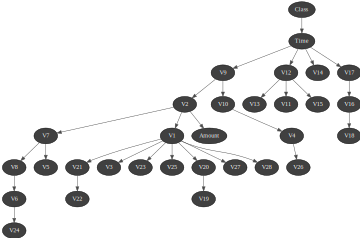

In [8]:
gnb.showBN(BNTest.bn)

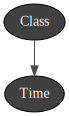

In [9]:
gnb.showBN(BNTest.MarkovBlanket) 

# Create a classifier from a Bayesian network

If we already have a Bayesian network with learned parameters, we can create a classifier that uses it. In this case we do not have to train the classifier on data since it the Bayesian network is already trained.

In [10]:
ClassfromBN = skbn.BNClassifier(significant_digit = 7)

In [11]:
ClassfromBN.fromTrainedModel(bn = BNTest.bn, targetAttribute = 'Class', targetModality = '1.0', 
                             threshold = BNTest.threshold, variableList = xTrain.columns.tolist())

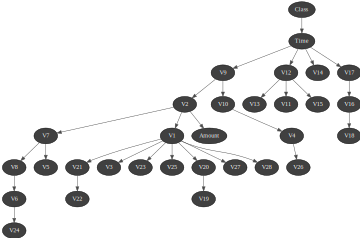

In [12]:
gnb.showBN(ClassfromBN.bn)

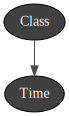

In [13]:
gnb.showBN(ClassfromBN.MarkovBlanket)

Then, we work with functions from scikit-learn like score.
We can also call it with a csv file or two array-likes.

In [14]:
xTest, yTest = ClassfromBN.XYfromCSV(filename = 'res/creditCardTest.csv', target = 'Class')

# Prediction with csv file

In [15]:
scoreCSV1 = BNTest.score('res/creditCardTest.csv', y = yTest)
print("{0:.2f}% good predictions".format(100*scoreCSV1)) 

84.38% good predictions


In [16]:
scoreCSV2 = ClassfromBN.score('res/creditCardTest.csv', y = yTest)
print("{0:.2f}% good predictions".format(100*scoreCSV2)) 

84.38% good predictions


## Prediction with array-like

In [17]:
scoreAR1 = BNTest.score(xTest, yTest)
print("{0:.2f}% good predictions".format(100*scoreAR1)) 

84.38% good predictions


In [18]:
scoreAR2 = ClassfromBN.score(xTest, yTest)
print("{0:.2f}% good predictions".format(100*scoreAR2)) 

84.38% good predictions


# ROC and Precision-Recall curves with all methods

In addition (and of  course), we can work with functions from pyAgrum (from  `pyAgrum.lib.bn2roc`).

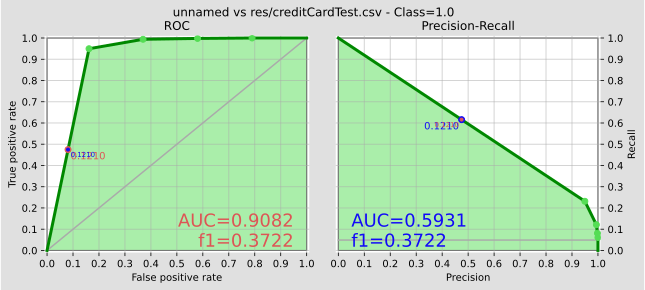

In [19]:
BNTest.showROC_PR('res/creditCardTest.csv')

# Explaining the classifier : ShapValues and Independence Lists

(tbd)